In [ ]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [ ]:
from pyspark.sql import SparkSession 

spark = SparkSession.builder.appName("Food Delivery Data").getOrCreate()

Amazon IAM user credentials for accessing S3 bucket and fetching data.

In [ ]:
access_key = 'A'
secret_key = 'g'
sc._jsc.hadoopConfiguration().set("fs.s3a.access.key", access_key)
sc._jsc.hadoopConfiguration().set("fs.s3a.secret.key", secret_key)

# If you are using Auto Loader file notification mode to load files, provide the AWS Region ID.
aws_region = "ap-south-1"
sc._jsc.hadoopConfiguration().set("fs.s3a.endpoint", "s3." + aws_region + ".amazonaws.com")


In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType,StringType
from pyspark.sql.functions import col

Schema for datasets

In [ ]:
schema_train = StructType([
    StructField("id", IntegerType(), True),
    StructField("week", IntegerType(), True),
    StructField("center_id", IntegerType(), True),
    StructField("meal_id", IntegerType(), True),
    StructField("checkout_price", FloatType(), True),
    StructField("base_price", FloatType(), True),
    StructField("emailer_for_promotion", IntegerType(), True),
    StructField("homepage_featured", IntegerType(), True),
    StructField("num_orders", IntegerType(), True)
])


In [ ]:
schema_meal = StructType([
    StructField("meal_id", IntegerType(), True),
    StructField("category", StringType(), True),
    StructField("cuisine", StringType(), True)
])

In [ ]:
schema_center = StructType([
    StructField("center_id", IntegerType(), True),
    StructField("city_code", IntegerType(), True),
    StructField("region_code", IntegerType(), True),
    StructField("center_type", StringType(), True),
    StructField("op_area", FloatType(), True)
])

# Loading Datasets

In [ ]:
train = spark.read.format("csv").option("header", "true").schema(schema_train).load("/FileStore/tables/train_new.csv")
meal = spark.read.format("csv").option("header", "true").schema(schema_meal).load("/FileStore/tables/meal_info.csv")
center = spark.read.format("csv").option("header", "true").schema(schema_center).load("/FileStore/tables/fulfilment_center_info.csv")

In [ ]:
train.show(5)

+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|     id|week|center_id|meal_id|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders|
+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|1379560|   1|       55|   1885|        152.29|    136.83|                    0|                0|       177|
|1466964|   1|       55|   1993|        136.83|    135.83|                    0|                0|       270|
|1346989|   1|       55|   2539|        135.86|    134.86|                    0|                0|       189|
|1338232|   1|       55|   2139|        437.53|     339.5|                    0|                0|        54|
|1448490|   1|       55|   2631|         243.5|     242.5|                    0|                0|        40|
+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
only showi

In [ ]:
train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- center_id: integer (nullable = true)
 |-- meal_id: integer (nullable = true)
 |-- checkout_price: float (nullable = true)
 |-- base_price: float (nullable = true)
 |-- emailer_for_promotion: integer (nullable = true)
 |-- homepage_featured: integer (nullable = true)
 |-- num_orders: integer (nullable = true)



In [ ]:
train.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+---------------------+-------------------+------------------+
|summary|                id|             week|         center_id|           meal_id|    checkout_price|       base_price|emailer_for_promotion|  homepage_featured|        num_orders|
+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+---------------------+-------------------+------------------+
|  count|            456544|           456546|            456546|            456541|            456548|           456548|               456548|             456546|            456546|
|   mean|1250095.9757876568|74.76874181353028| 82.10585570785857|2024.3354375620152|354.62827624165215|331.7672854244881|  0.08115247465764827|0.10920038725561061| 261.8735242450925|
| stddev|144355.22202244448|41.52504112490019|45.974980379968244| 547.4207712027395|1

In [ ]:
meal.show(5)

+-------+---------+-------+
|meal_id| category|cuisine|
+-------+---------+-------+
|   1885|Beverages|   Thai|
|   1993|Beverages|   Thai|
|   2539|Beverages|   Thai|
|   1248|Beverages| Indian|
|   2631|Beverages| Indian|
+-------+---------+-------+
only showing top 5 rows



In [ ]:
meal.printSchema()

root
 |-- meal_id: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- cuisine: string (nullable = true)



In [ ]:
center.show(5)

+---------+---------+-----------+-----------+-------+
|center_id|city_code|region_code|center_type|op_area|
+---------+---------+-----------+-----------+-------+
|       11|      679|         56|     TYPE_A|    3.7|
|       13|      590|         56|     TYPE_B|    6.7|
|      124|      590|         56|     TYPE_C|    4.0|
|       66|      648|         34|     TYPE_A|    4.1|
|       94|      632|         34|     TYPE_C|    3.6|
+---------+---------+-----------+-----------+-------+
only showing top 5 rows



In [ ]:
center.printSchema()

root
 |-- center_id: integer (nullable = true)
 |-- city_code: integer (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- center_type: string (nullable = true)
 |-- op_area: float (nullable = true)



In [ ]:
train_new = train.dropDuplicates()

In [ ]:
train_null_values = train_new.filter(
    col("id").isNull() | col("week").isNull() | col("center_id").isNull() |
    col("meal_id").isNull() | col("checkout_price").isNull() |
    col("base_price").isNull() | col("emailer_for_promotion").isNull() |
    col("homepage_featured").isNull() | col("num_orders").isNull()
)

In [ ]:
train_new.filter(col("week").isNull()).show(5)

+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|     id|week|center_id|meal_id|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders|
+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|1231227|null|       67|   1543|        485.03|    388.03|                    0|                0|       163|
|1149954|null|       30|   1062|        163.02|    161.02|                    0|                0|       203|
+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+



In [ ]:
train_null_values.show()

+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|     id|week|center_id|meal_id|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders|
+-------+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
|1236933|   1|     null|   1445|        628.62|    627.62|                    0|                1|        81|
|   null|   1|       11|   1247|        447.23|    387.03|                    0|                0|        40|
|1231227|null|       67|   1543|        485.03|    388.03|                    0|                0|       163|
|   null|  95|      157|   2322|        325.01|    324.01|                    0|                0|        42|
|1252498|  79|       30|   null|        533.53|    532.53|                    0|                0|        28|
|1060656|  79|       77|   null|        259.05|    258.05|                    0|                0|       447|
|1388300| 

In [ ]:
train_no_nulls = train_new.dropna()

In [ ]:
train_null_values_new = train_no_nulls.filter(
    col("id").isNull() | col("week").isNull() | col("center_id").isNull() |
    col("meal_id").isNull() | col("checkout_price").isNull() |
    col("base_price").isNull() | col("emailer_for_promotion").isNull() |
    col("homepage_featured").isNull() | col("num_orders").isNull()
)

In [ ]:
train_null_values_new.show()

+---+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
| id|week|center_id|meal_id|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders|
+---+----+---------+-------+--------------+----------+---------------------+-----------------+----------+
+---+----+---------+-------+--------------+----------+---------------------+-----------------+----------+



In [ ]:
center_null_values = center.filter(
    col("center_id").isNull() | col("city_code").isNull() | col("region_code").isNull() |
    col("center_type").isNull() | col("op_area").isNull()
)

# Show rows with null values
center_null_values.show()


+---------+---------+-----------+-----------+-------+
|center_id|city_code|region_code|center_type|op_area|
+---------+---------+-----------+-----------+-------+
+---------+---------+-----------+-----------+-------+



In [ ]:
meal.filter(meal['category'].isNull() | meal['cuisine'].isNull()).show()
meal = meal.dropDuplicates()

+-------+--------+-------+
|meal_id|category|cuisine|
+-------+--------+-------+
+-------+--------+-------+



In [ ]:
result = train_no_nulls.join(meal, on="meal_id", how="inner")

In [ ]:
result.show(5)

+-------+-------+----+---------+--------------+----------+---------------------+-----------------+----------+---------+-----------+
|meal_id|     id|week|center_id|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders| category|    cuisine|
+-------+-------+----+---------+--------------+----------+---------------------+-----------------+----------+---------+-----------+
|   2322|1346854|   1|       24|        387.09|    322.07|                    0|                0|       324|Beverages|Continental|
|   1247|1453408|   1|       83|        485.03|    484.03|                    0|                0|        67|  Biryani|     Indian|
|   1971|1283719|   1|       52|        322.04|    260.99|                    1|                0|       296| Sandwich|    Italian|
|   1727|1028436|   1|       93|        404.55|    403.55|                    0|                0|       176|Rice Bowl|     Indian|
|   1971|1020019|   1|      186|        289.06|    260.96|                  

In [ ]:
result = result.join(center,on="center_id",how="inner")

In [ ]:
result.show(5)

+---------+-------+-------+----+--------------+----------+---------------------+-----------------+----------+---------+-----------+---------+-----------+-----------+-------+
|center_id|meal_id|     id|week|checkout_price|base_price|emailer_for_promotion|homepage_featured|num_orders| category|    cuisine|city_code|region_code|center_type|op_area|
+---------+-------+-------+----+--------------+----------+---------------------+-----------------+----------+---------+-----------+---------+-----------+-----------+-------+
|       24|   2322|1346854|   1|        387.09|    322.07|                    0|                0|       324|Beverages|Continental|      614|         85|     TYPE_B|    3.6|
|       83|   1247|1453408|   1|        485.03|    484.03|                    0|                0|        67|  Biryani|     Indian|      659|         77|     TYPE_A|    5.3|
|       52|   1971|1283719|   1|        322.04|    260.99|                    1|                0|       296| Sandwich|    Italian

In [ ]:
result.printSchema()

root
 |-- center_id: integer (nullable = true)
 |-- meal_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- checkout_price: float (nullable = true)
 |-- base_price: float (nullable = true)
 |-- emailer_for_promotion: integer (nullable = true)
 |-- homepage_featured: integer (nullable = true)
 |-- num_orders: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- cuisine: string (nullable = true)
 |-- city_code: integer (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- center_type: string (nullable = true)
 |-- op_area: float (nullable = true)



# Analyzing Data 

Creating Table using result dataframe for analysis

In [ ]:
result.createOrReplaceTempView("Food_data")

In [ ]:
result.printSchema()

root
 |-- center_id: integer (nullable = true)
 |-- meal_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- week: integer (nullable = true)
 |-- checkout_price: float (nullable = true)
 |-- base_price: float (nullable = true)
 |-- emailer_for_promotion: integer (nullable = true)
 |-- homepage_featured: integer (nullable = true)
 |-- num_orders: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- cuisine: string (nullable = true)
 |-- city_code: integer (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- center_type: string (nullable = true)
 |-- op_area: float (nullable = true)



### Top Three Categories Across Each Centers

In [ ]:
top_three_category_across_each_center = spark.sql("""WITH GroupedCategory AS (
    SELECT
        center_type,
        category,
        SUM(num_orders) AS total_orders
    FROM
        Food_data
    GROUP BY
        center_type, category
),
RankedCategories AS (
    SELECT
        center_type,
        category,
        total_orders,
        ROW_NUMBER() OVER (PARTITION BY center_type ORDER BY total_orders DESC) AS rank
    FROM
        GroupedCategory
)
SELECT
    center_type,
    category,
    total_orders
FROM
    RankedCategories
WHERE
    rank <= 3;
""")

In [ ]:
top_three_category_across_each_center.show()

+-----------+---------+------------+
|center_type| category|total_orders|
+-----------+---------+------------+
|     TYPE_A|Beverages|    24632235|
|     TYPE_A|Rice Bowl|    11847403|
|     TYPE_A| Sandwich|     9842817|
|     TYPE_B|Beverages|     9340360|
|     TYPE_B|Rice Bowl|     5519104|
|     TYPE_B| Sandwich|     3760525|
|     TYPE_C|Beverages|     6506308|
|     TYPE_C| Sandwich|     4032254|
|     TYPE_C|Rice Bowl|     3507109|
+-----------+---------+------------+



In [ ]:
pandas_df1 = top_three_category_across_each_center.toPandas()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

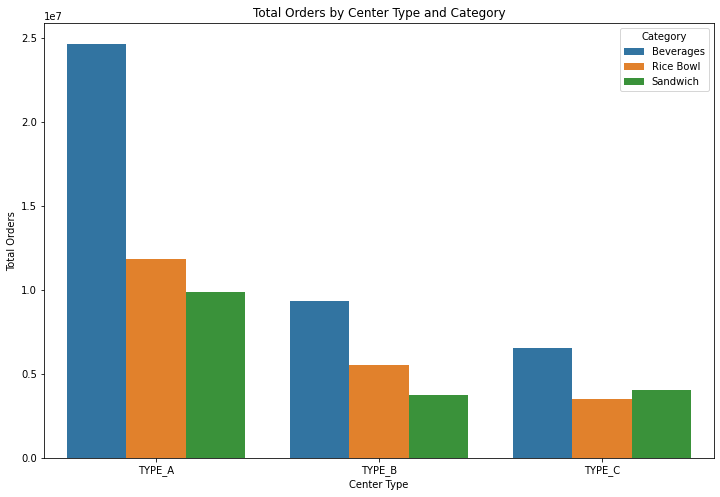

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='center_type', y='total_orders', hue='category', data=pandas_df1)
plt.title('Total Orders by Center Type and Category')
plt.xlabel('Center Type')
plt.ylabel('Total Orders')
plt.legend(title='Category')
plt.show()


### Total numbers of orders for every cuisine

In [ ]:
total_order_cuisine = spark.sql("""
                                select cuisine,sum(num_orders) as Total from Food_data
                                group by cuisine
                                order by Total;""")

In [ ]:
total_order_cuisine.show()

+-----------+--------+
|    cuisine|   Total|
+-----------+--------+
|Continental|16914071|
|     Indian|25791827|
|       Thai|32677129|
|    Italian|44168526|
+-----------+--------+



In [ ]:
pandas_df12 = total_order_cuisine.toPandas()

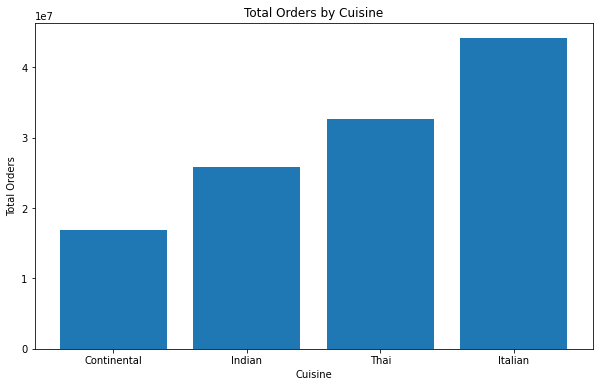

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(pandas_df12['cuisine'], pandas_df12['Total'])
plt.title('Total Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.show()

### Number of order across different centers for every week

In [ ]:
total_order_week = spark.sql("""
                             select center_type,week,sum(num_orders) as Total
                             from Food_data
                             group by center_type,week
                             order by week;""")

In [ ]:
total_order_week.show(5)

+-----------+----+------+
|center_type|week| Total|
+-----------+----+------+
|     TYPE_A|   1|451977|
|     TYPE_B|   1|199803|
|     TYPE_C|   1|140360|
|     TYPE_A|   2|463522|
|     TYPE_C|   2|132468|
+-----------+----+------+
only showing top 5 rows



In [ ]:
pandas_df13 = total_order_week.toPandas()

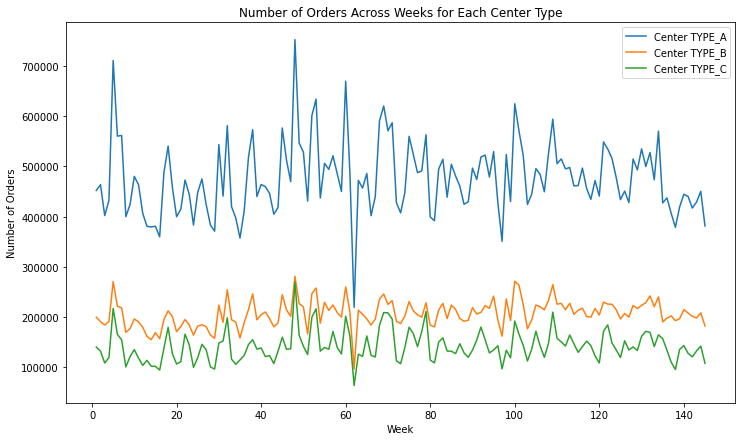

In [ ]:
centers = ["TYPE_A","TYPE_B","TYPE_C"]
plt.figure(figsize=(12, 7))
for center in centers:
    center_data = pandas_df13[pandas_df13['center_type'] == center]
    plt.plot(center_data['week'], center_data['Total'], label=f'Center {center}')

plt.title('Number of Orders Across Weeks for Each Center Type')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

### Total Check out price by cuisine

In [ ]:
check_out_price_cuisine = spark.sql("""
                                    select cuisine,sum(checkout_price) as Total_price from Food_data
                                    group by cuisine""")

In [ ]:
check_out_price_cuisine.show()

+-----------+--------------------+
|    cuisine|         Total_price|
+-----------+--------------------+
|       Thai|2.6556793063476562E7|
|     Indian| 4.097472124443054E7|
|Continental|  5.73731134909668E7|
|    Italian| 3.699368228261566E7|
+-----------+--------------------+



In [ ]:
cuisine_checkout = check_out_price_cuisine.toPandas()

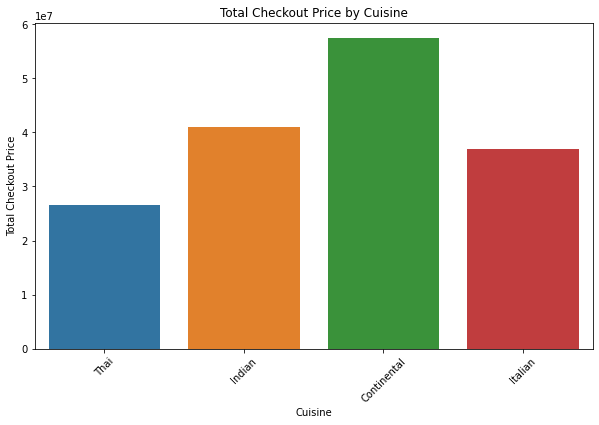

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='Total_price', data=cuisine_checkout)
plt.title('Total Checkout Price by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Checkout Price')
plt.xticks(rotation=45)
plt.show()

### Region-wise Order Distribution for Each Cuisine

In [ ]:
region_order = spark.sql("""
                        SELECT cuisine,
                            region_code,
                            SUM(num_orders) AS total_orders
                        FROM
                            Food_data
                        GROUP BY
                            cuisine,
                            region_code
""")

In [ ]:
region_order_df = region_order.toPandas()

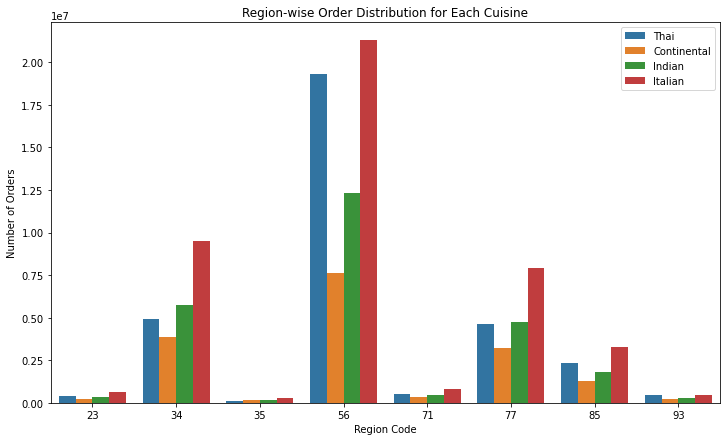

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='region_code', y='total_orders', hue='cuisine', data=region_order_df)
plt.title('Region-wise Order Distribution for Each Cuisine')
plt.xlabel('Region Code')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

### Region-wise Checkout Price for Each Cuisine

In [ ]:
cuisine_checkout = spark.sql("""
                             SELECT cuisine,region_code,
                            SUM(checkout_price) OVER (PARTITION BY cuisine ORDER BY region_code) checkout_price
                            FROM Food_data 
                            ORDER BY cuisine, region_code;
""")

In [ ]:
cuisine_checkout_df = cuisine_checkout.toPandas()

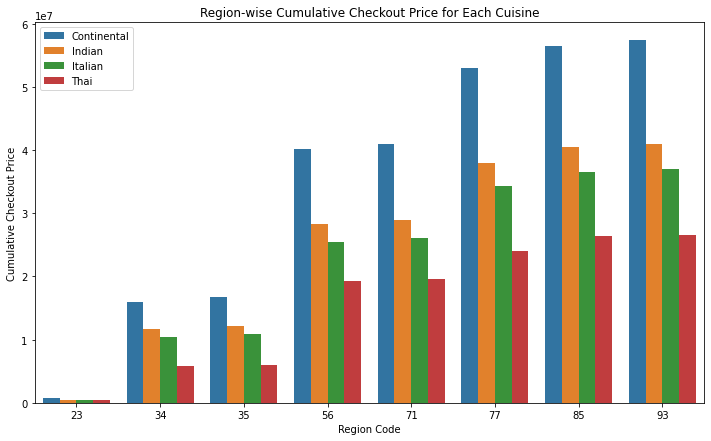

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='region_code', y='checkout_price', hue='cuisine', data=cuisine_checkout_df)
plt.title('Region-wise Cumulative Checkout Price for Each Cuisine')
plt.xlabel('Region Code')
plt.ylabel('Cumulative Checkout Price')
plt.legend()
plt.show()

# Loading Data in S3 bucket in parquet format

In [ ]:
## result.coalesce(1).write.parquet('s3a://trypiyush/try123.parquet')